In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder,OneHotEncoder

# Step 2: Load Data
datasets = pd.read_csv('/content/Data_for_Transformation.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())
# print(datasets.Age.std)

# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)
X_new = datasets.iloc[:,1:3].values
print("\n\nX for transformation : \n", X_new)


Data :
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No

Data statistics
              Age        Salary
count  11.000000     11.000000
mean   39.363636  63363.636364
std     7.131237  11386.594989
min    27.000000  48000.000000
25%    36.000000  54500.000000
50%    39.000000  61000.000000
75%    44.500000  70000.000000
max    50.000000  83000.000000


Input : 
 [['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]


Output: 
 ['No' 'Yes' 'No' 'N

In [ ]:
# Step 4 : Perform scaling on age and salary
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)

In [ ]:
scaler = StandardScaler()
X_Standerded = scaler.fit_transform(X_new)
print("\n\nStanderdisation Data: \n", X_Standerded)

# Steps for Handling Categorical Data

In [ ]:
datasets = pd.read_csv('/content/Data_for_Categorical_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No

Data statistics
              Age        Salary
count  11.000000     11.000000
mean   39.363636  63363.636364
std     7.131237  11386.594989
min    27.000000  48000.000000
25%    36.000000  54500.000000
50%    39.000000  61000.000000
75%    44.500000  70000.000000
max    50.000000  83000.000000


In [ ]:
# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)



Input : 
 [['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]


Output: 
 ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [ ]:
# Step 4a: Apply LabelEncoder on the data
# to convert country names into numeric values
le = LabelEncoder()
X[ : ,0] = le.fit_transform(X[ : ,0])
print("\n\nInput : \n", X)

# Step 4b: Use dummy variables from pandas library
# to create one column for each country
dummy = pd.get_dummies(datasets['Country'])
print("\n\nDummy :\n",dummy)
datasets = datasets.drop(['Country','Purchased'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print("\n\nFinal Data :\n",datasets)



Input : 
 [[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [3 nan nan]
 [1 40.0 nan]
 [0 35.0 58000.0]
 [2 nan 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]
 [2 45.0 55000.0]]


Dummy :
     France  Germany  Spain
0        1        0      0
1        0        0      1
2        0        1      0
3        0        0      1
5        0        1      0
6        1        0      0
7        0        0      1
8        1        0      0
9        0        1      0
10       1        0      0
11       0        0      1


Final Data :
     France  Germany  Spain   Age   Salary
0        1        0      0  44.0  72000.0
1        0        0      1  27.0  48000.0
2        0        1      0  30.0  54000.0
3        0        0      1  38.0  61000.0
5        0        1      0  40.0      NaN
6        1        0      0  35.0  58000.0
7        0        0      1   NaN  52000.0
8        1        0      0  48.0  79000.0
9        0        1      0  50.0  83000.0
10       1

In [ ]:
#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()

x = onehotencoder.fit_transform(datasets.Country.values.reshape(-1,1)).toarray()

In [ ]:
x

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(datasets.shape[1]-1)])
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column
df= df.drop(['Country'], axis=1)
#printing to verify
print(df.head())

   Age  Salary Purchased  Country_0  Country_1  Country_2
0   44   72000        No        1.0        0.0        0.0
1   27   48000       Yes        0.0        0.0        1.0
2   30   54000        No        0.0        1.0        0.0
3   38   61000        No        0.0        0.0        1.0
4   40   68000       Yes        0.0        1.0        0.0


# Steps for Handling the missing value

In [ ]:
from sklearn.impute import SimpleImputer

datasets = pd.read_csv('/content/Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


In [ ]:
# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)



Input : 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


Output: 
 ['No' 'Yes' 'No' 'No' nan 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [ ]:
# Step 4: Find the missing values and handle it in either way
# 4a. Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)

#4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)


New Data :     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [ ]:
updated_df = datasets;
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    11 non-null     object 
 1   Age        11 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchased  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 440.0+ bytes


In [ ]:
datasets

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,Germany,40.0,NaN,Yes
6,France,35.0,58000.0,Yes
7,Spain,39.4,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes


In [ ]:
updated_df = datasets;
updated_df['Salary']=updated_df['Salary'].fillna(updated_df['Salary'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    11 non-null     object 
 1   Age        11 non-null     float64
 2   Salary     11 non-null     float64
 3   Purchased  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 440.0+ bytes


In [ ]:
datasets

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,Germany,40.0,62900.0,Yes
6,France,35.0,58000.0,Yes
7,Spain,39.4,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes


In [ ]:
new_X = datasets.iloc[:, :-1].values
# Only last column
new_Y = datasets.iloc[:, -1].values


In [ ]:
#Using SimpleImputer from Scikit-Learn Library

# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Step 2: Load Data
datasets = pd.read_csv('Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())

# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)

# Step 4: Find the missing values and handle it in either way
# 4a. Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)

#4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)

# 4b. Imputation (Replacing null values with mean value of that attribute)
# All rows, all columns except last
new_X = datasets.iloc[:, :-1].values
# Only last column
new_Y = datasets.iloc[:, -1].values
updated_df['Age'].fillna(updated_df['Age'].mean())
# Using Imputer function to replace NaN values with mean of that parameter value
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
# Fitting the data, function learns the stats
imputer = imputer.fit(new_X[:, 1:3])
# fit_transform() will execute those stats on the input ie. X[:, 1:3]
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3])
# filling the missing value with mean
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X)


Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


Input : 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 7

# Correlation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('/content/Data_for_Correlation.csv')

data.head()

,X1,X2,X3,X4,Y
0,1,1,4,-2,1
1,2,4,5,-4,1
2,3,9,6,3,0
3,4,16,7,4,0
4,5,25,8,25,1


In [ ]:
data = data.iloc[:,:-1]
data.head()

,X1,X2,X3,X4
0,1,1,4,-2
1,2,4,5,-4
2,3,9,6,3
3,4,16,7,4
4,5,25,8,25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      14 non-null     int64
 1   X2      14 non-null     int64
 2   X3      14 non-null     int64
 3   X4      14 non-null     int64
dtypes: int64(4)
memory usage: 576.0 bytes


In [ ]:
corr = data.corr()
corr.head()

,X1,X2,X3,X4
X1,1.000000,0.972714,1.000000,0.263266
X2,0.972714,1.000000,0.972714,0.163575
X3,1.000000,0.972714,1.000000,0.263266
X4,0.263266,0.163575,0.263266,1.000000


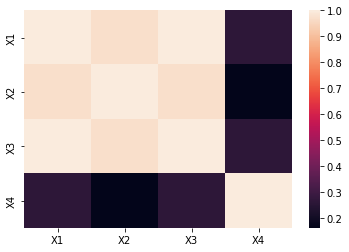

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

In [ ]:
selected_columns = data.columns[columns]
selected_columns.shape

(2,)

In [ ]:
data = data[selected_columns]
print(data)

    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1


**1) Perform all data preprocessing tasks and feature selection on "Exercise-CarData.csv" Hint: Check
"na_values" attribute of pd.read()**